In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# load the raw cardiovascular dataset
df = pd.read_csv("/content/cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# check how many columns the dataset has
print(f"Number of columns: { df.shape[1] }")

Number of columns: 13


In [4]:
# check how many rows (observations) are in the dataset
print(f"Number of rows: { df.shape[0] }")

Number of rows: 70000


In [5]:
# view data types and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# convert age from days to years for easier interpretation
df['age'] = round(df['age']/365.25, 2)

In [7]:
# create binary gender columns
df.insert(3, "female", (df['gender'] == 1).astype(int))
df.insert(4, "male", (df['gender'] == 2).astype(int))

# drop original gender column and id since they are no longer needed
df.drop(['gender', 'id'], axis=1, inplace=True)

In [8]:
# check how many duplicate rows exist
df.duplicated().sum()

np.int64(75)

In [9]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
# calculate BMI using height and weight
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

In [11]:
# view summary statistics
df.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000
mean,53.302892,0.650268,0.349732,164.358699,74.215407,27.560388,128.826314,96.648538,1.367222,1.226671,0.088223,0.053829,0.803661,0.499979
std,6.755908,0.476889,0.476889,8.213453,14.399663,6.093355,154.093668,188.572745,0.680480,0.572490,0.283621,0.225682,0.397231,0.500004
min,29.560000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.360000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.940000,1.000000,0.000000,165.000000,72.000000,26.400000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.390000,1.000000,1.000000,170.000000,82.000000,30.230000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.920000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# remove unrealistic BMI values
df.drop(df.query('bmi > 60 or bmi < 15').index, axis=0, inplace=True)

In [13]:
# check dataset again after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69832 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69832 non-null  float64
 1   female       69832 non-null  int64  
 2   male         69832 non-null  int64  
 3   height       69832 non-null  int64  
 4   weight       69832 non-null  float64
 5   bmi          69832 non-null  float64
 6   ap_hi        69832 non-null  int64  
 7   ap_lo        69832 non-null  int64  
 8   cholesterol  69832 non-null  int64  
 9   gluc         69832 non-null  int64  
 10  smoke        69832 non-null  int64  
 11  alco         69832 non-null  int64  
 12  active       69832 non-null  int64  
 13  cardio       69832 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 8.0 MB


In [14]:
# function to categorize blood pressure into standard groups
def BPCategorize(x, y):
    if x <= 120 and y <= 80:
        return 'normal'
    elif x <= 129 and y <= 80:
        return 'elevated'
    elif x <= 139 or y <= 89:
        return 'high 1'
    elif x <= 180 or y <= 120:
        return 'high 2'
    elif x > 180 or y > 120:
        return 'high 3'
    else:
        return None

# apply BP category function row by row
df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))

# check how many observations fall into each BP category
df['bp_cat'].value_counts()

,count
bp_cat,
normal,38937
high 1,15378
high 2,15021
elevated,419
high 3,77


In [15]:
# remove extreme and unrealistic blood pressure values
df.drop(df.query('ap_hi > 220 or ap_lo > 180 or ap_hi < 40 or ap_lo < 40').index,
        axis=0, inplace=True)

In [16]:
# preview cleaned dataset
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


In [17]:
# set a base color for consistent plots
base_color = sb.color_palette()[0]

In [18]:
# helper function to label gender for plotting
def gender(x, y):
    if x == 1:
        return 'female'
    else:
        return 'male'

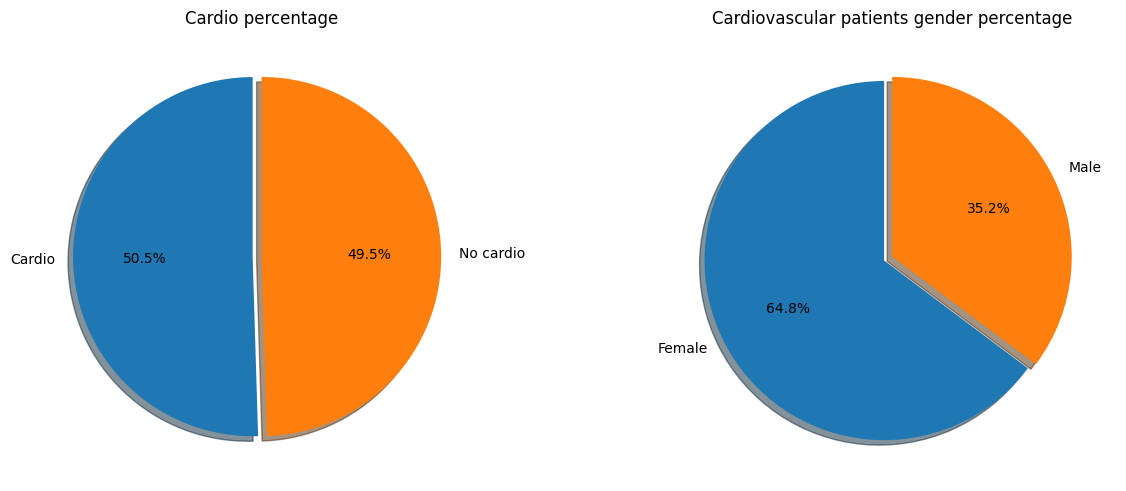

In [19]:
# pie charts showing disease prevalence and gender split among patients
fig, ax = plt.subplots(1, 2, figsize=(14, 20))
plt.tight_layout(pad=10)

ax[0].pie(x=df['cardio'].value_counts(),
          labels=['Cardio', 'No cardio'],
          autopct='%1.1f%%',
          shadow=True,
          startangle=90,
          explode=(0.05, 0.0))
ax[0].title.set_text('Cardio percentage')

gender = df.query("cardio == 1") \
           .apply(lambda row: gender(row['female'], row['male']), axis=1) \
           .value_counts()

ax[1].pie(x=gender,
          labels=['Female', 'Male'],
          autopct='%1.1f%%',
          shadow=True,
          startangle=90,
          explode=(0.05, 0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')

/tmp/ipython-input-4277512906.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['No-cardio', 'Cardio'])
/tmp/ipython-input-4277512906.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No-cardio', 'Cardio'])


Text(0.5, 80.7222222222222, '')

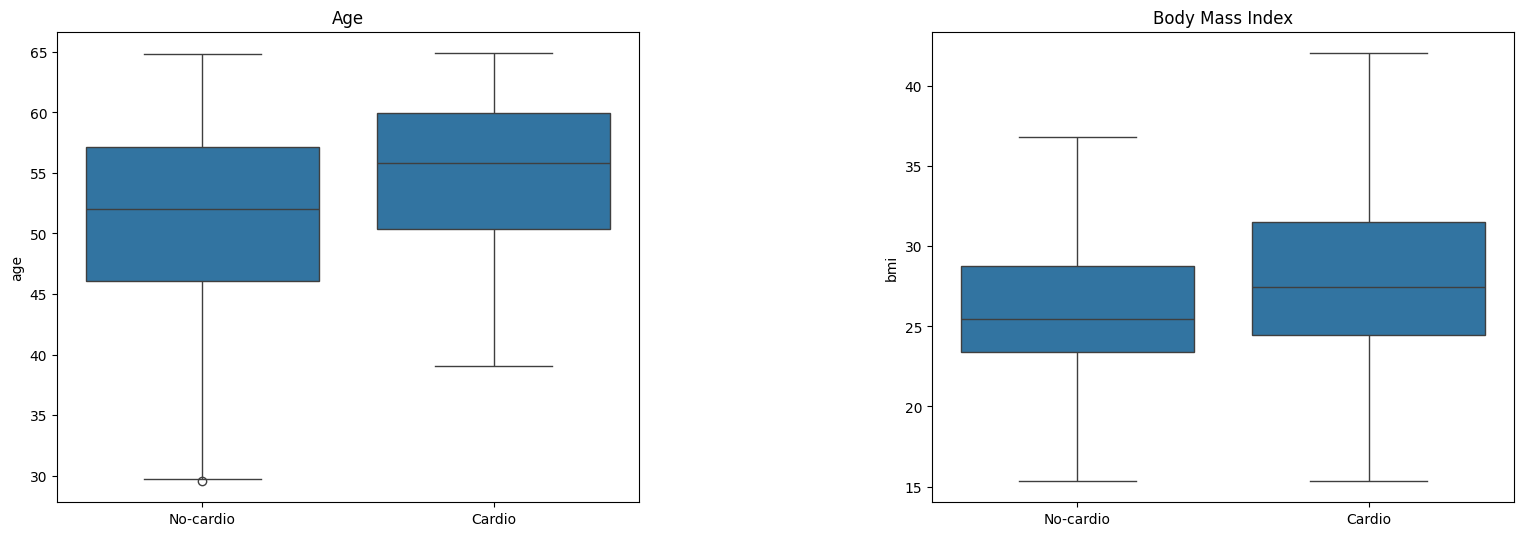

In [20]:
# boxplots comparing age and BMI for cardio vs non cardio patients
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
plt.tight_layout(pad=18)

sb.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)

ax[0].title.set_text('Age')
ax[1].title.set_text('Body Mass Index')

ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].set_xticklabels(['No-cardio', 'Cardio'])

ax[0].set_xlabel("")
ax[1].set_xlabel("")

/tmp/ipython-input-2437753976.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
/tmp/ipython-input-2437753976.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])


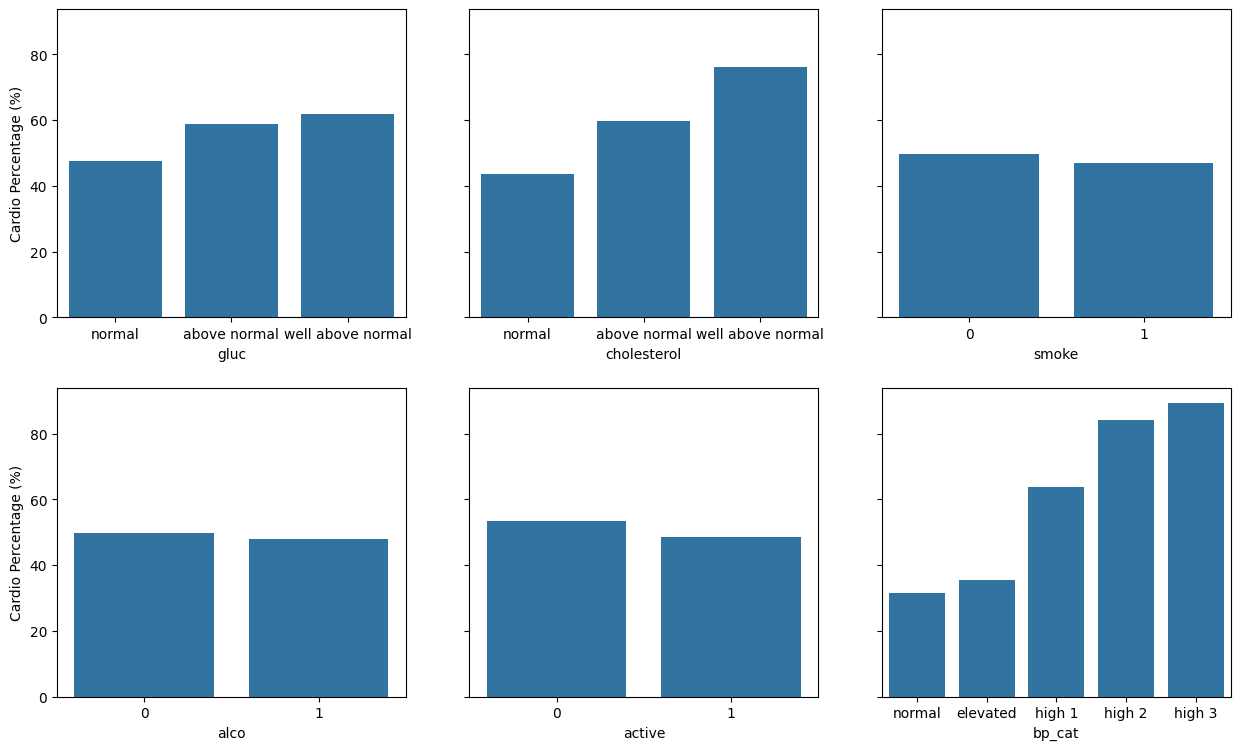

In [21]:
# convert target variable into percentage form for bar plots
df['cardio_percent'] = df['cardio'] * 100

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(13, 8), sharey=True)
plt.tight_layout(pad=3)

# glucose
sb.barplot(data=df, x='gluc', y='cardio_percent', ax=ax[0][0],
           color=base_color, errorbar=None)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])

# cholesterol
sb.barplot(data=df, x='cholesterol', y='cardio_percent', ax=ax[0][1],
           color=base_color, errorbar=None)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

# smoking
sb.barplot(data=df, x='smoke', y='cardio_percent', ax=ax[0][2],
           color=base_color, errorbar=None)

# alcohol
sb.barplot(data=df, x='alco', y='cardio_percent', ax=ax[1][0],
           color=base_color, errorbar=None)

# physical activity
sb.barplot(data=df, x='active', y='cardio_percent', ax=ax[1][1],
           color=base_color, errorbar=None)

# blood pressure category
sb.barplot(data=df, x='bp_cat', y='cardio_percent', ax=ax[1][2],
           color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'],
           errorbar=None)

plt.setp(ax[:, 0], ylabel='Cardio Percentage (%)')
plt.show()

In [22]:
# simple percentage checks for different risk groups
df_age_50 = df.query('age >= 50')
round(df_age_50.query('cardio == 1').shape[0] * 100 / df_age_50.shape[0], 2)

55.46

In [23]:
df_bmi37 = df.query('bmi >= 37')
round(df_bmi37.query('cardio == 1').shape[0] * 100 / df_bmi37.shape[0], 2)

68.78

In [24]:
df_high3 = df.query("bp_cat == 'high 3'")
round(df_high3.query('cardio == 1').shape[0] * 100 / df_high3.shape[0], 2)

89.29

In [25]:
df_cohol_smoke = df.query("alco == 1 or smoke == 1")
df_cohol_smoke.shape[0] * 100 / df.shape[0]

11.53756450249264

In [26]:
df_cohol_smoke.query('cardio == 1').shape[0] * 100 / df_cohol_smoke.shape[0]

47.95957043588124

In [27]:
df_not_active = df.query('active == 0')
df_not_active.query('cardio == 1').shape[0] * 100 / df_not_active.shape[0]

53.28196769891836

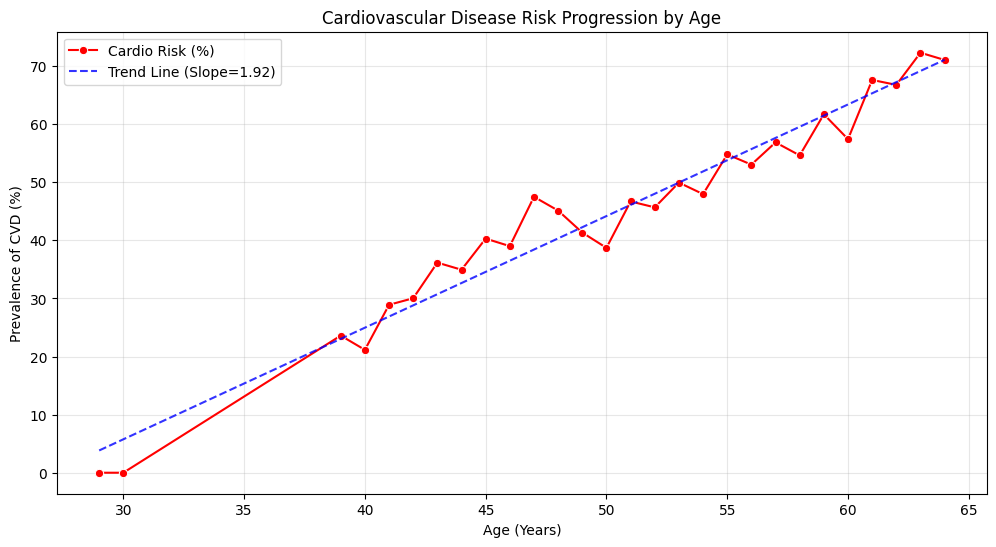

In [28]:
# analyze how cardiovascular risk changes with age
df['age_years'] = df['age'].astype(int)
age_trend = df.groupby('age_years')['cardio'].mean() * 100

plt.figure(figsize=(12, 6))
sb.lineplot(x=age_trend.index, y=age_trend.values,
            color='red', marker='o', label='Cardio Risk (%)')

# add a simple trend line
z = np.polyfit(age_trend.index, age_trend.values, 1)
p = np.poly1d(z)
plt.plot(age_trend.index, p(age_trend.index),
         "b--", alpha=0.8,
         label=f'Trend Line (Slope={round(z[0],2)})')

plt.title('Cardiovascular Disease Risk Progression by Age')
plt.xlabel('Age (Years)')
plt.ylabel('Prevalence of CVD (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
# save cleaned dataset for modeling notebook
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/cardio_clean.csv", index=False)